In [1]:
!pip install opencv-python


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2

Ukuran data latih : (60000, 28, 28, 1)
Ukuran data uji   : (10000, 28, 28, 1)


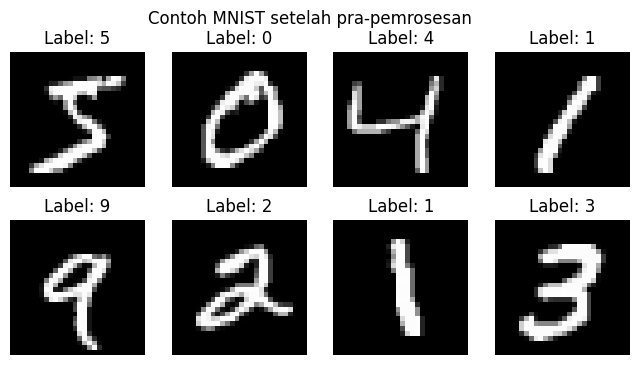

In [19]:
# 1️⃣ Load dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# 2️⃣ Pra-pemrosesan: normalisasi & reshape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print("Ukuran data latih :", x_train.shape)
print("Ukuran data uji   :", x_test.shape)

# 3️⃣ Visualisasi contoh data MNIST
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Contoh MNIST setelah pra-pemrosesan")
plt.show()


In [22]:
modelA = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelA.summary()


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
modelA.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [32]:
history = modelA.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9621 - loss: 0.1244 - val_accuracy: 0.9827 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9870 - loss: 0.0408 - val_accuracy: 0.9885 - val_loss: 0.0351
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9910 - loss: 0.0284 - val_accuracy: 0.9901 - val_loss: 0.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9885 - val_loss: 0.0402
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9888 - val_loss: 0.0382


In [32]:
test_loss, test_acc = modelA.evaluate(x_test, y_test, verbose=0)
print(f"Akurasi Model A pada data uji MNIST: {test_acc*100:.2f}%")


Akurasi Model A pada data uji MNIST: 99.07%


In [26]:
modelA.save("modelA_mnist_cnn.h5")
print("✅ Model A disimpan sebagai 'modelA_mnist_cnn.h5'")


✅ Model A disimpan sebagai 'modelA_mnist_cnn.h5'


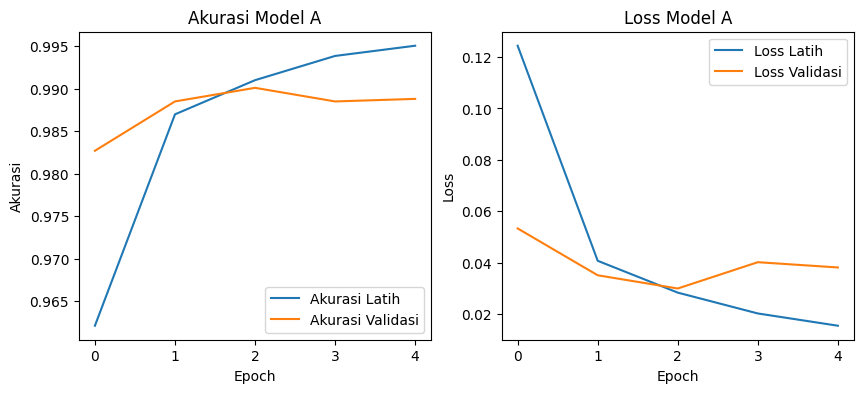

In [33]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title("Akurasi Model A")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title("Loss Model A")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [63]:
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)           # Inversi warna (putih -> hitam)
    img = cv2.resize(img, (28, 28))      # Ubah ukuran jadi 28x28
    img = img / 255.0                    # Normalisasi
    img = img.reshape(1, 28, 28, 1)      # Ubah bentuk untuk CNN
    return img
    import cv2


In [73]:
img0 = preprocess_image("img0.png")
img8 = preprocess_image("img8.png")
img9 = preprocess_image("img9.png")

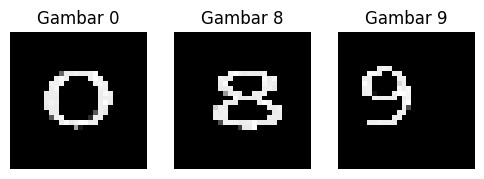

In [75]:
plt.figure(figsize=(6,2))
for i, img in enumerate([img0, img8, img9]):
    plt.subplot(1, 3, i+1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.title(f"Gambar {['0','8','9'][i]}")
    plt.axis('off')
plt.show()


In [77]:
preds = [modelA.predict(img) for img in [img0, img8, img9]]
hasil = [np.argmax(p) for p in preds]

for i, h in enumerate(hasil):
    print(f"Prediksi gambar ke-{i+1} → Angka {h}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediksi gambar ke-1 → Angka 0
Prediksi gambar ke-2 → Angka 3
Prediksi gambar ke-3 → Angka 9


In [47]:
from tensorflow.keras import applications, Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd
from glob import glob


In [49]:
# Pilihan arsitektur: MobileNetV2 (ringan & cepat). 
# Pretrained models expect 3 channels + ukuran biasanya >= 32x32.
TARGET_SIZE = (32, 32)
BATCH_SIZE_B = 128
EPOCHS_B = 5   # bisa ditambah (mis. 10-15) kalau mau fine-tune lebih lama

# Fungsi untuk mengubah dataset MNIST (grayscale 28x28) -> shape (N, TARGET_SIZE, TARGET_SIZE, 3)
def expand_and_resize_mnist(x):
    # x shape: (N,28,28,1) atau (N,28,28)
    x_resized = tf.image.resize(x, TARGET_SIZE)  # results float32
    # jika single-channel, duplikat kanal jadi 3
    if x_resized.shape[-1] == 1:
        x_resized = tf.image.grayscale_to_rgb(x_resized)
    return x_resized.numpy()


In [51]:
# Transfer Learning (Model B)
# ===========================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
